In [4]:
# Import useful libraries for analysis

import pandas as pd
import histlite as hl
import numpy as np
from matplotlib import pyplot as plt
import os
from cycler import cycler
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

import matplotlib
from matplotlib.backends.backend_pdf import PdfPages


plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (9,8)

In [2]:
from SignalCalculator import SignalCalculator

In [2]:

# # This is the function called "f" in Mike's paper
# def ImageChargeDefiniteIntegral(x,y,z):
#     return np.arctan(x*y / (z * np.sqrt(x**2 + y**2 + z**2)))


# ######################################################################################\
# # Define a function to compute the charge observed by a square pad, centered at (0,0,0) 
# def InducedChargeSquarePadNumerical(Q,x,y,z,padSize=3.,numPoints=300):
    
#     padDiagonalSize = padSize # mm
#     padEdgeSize = padDiagonalSize/np.sqrt(2.)
    
    
#     xarray = np.linspace(-padEdgeSize/2.,padEdgeSize/2.,numPoints)

#     pointSpacing = xarray[2]-xarray[1]

#     xv,yv = np.meshgrid(xarray,xarray)
    
#     chargeDensity =  Q * z / (2 * np.pi * ((x-xv)**2 + (y-yv)**2 + z**2)**(3/2))
    
#     induced_charge = np.sum(chargeDensity * pointSpacing**2 )
    
#     if z > 0.:
#         return induced_charge
#     if z == 0.:
#         if (x>xarray[0])&(x<xarray[-1])&(y>xarray[0])&(y<xarray[-1]):
#             return Q
#         else:
#             return 0.
        
        
# ######################################################################################\
# # Define a function to compute the charge observed by a square pad, centered at (0,0,0) 
# def InducedChargeSquarePadExact(Q,x,y,z,padSize=3.):
    
#     padDiagonalSize = padSize # mm
#     padEdgeSize = padDiagonalSize/np.sqrt(2.)
    
#     induced_charge = Q /(2.*np.pi) * ( \
#                         ImageChargeDefiniteIntegral(-padEdgeSize/2.-x,-padEdgeSize/2.-y,z)\
#                         - ImageChargeDefiniteIntegral(padEdgeSize/2.-x,-padEdgeSize/2.-y,z)\
#                         - ImageChargeDefiniteIntegral(-padEdgeSize/2.-x,padEdgeSize/2.-y,z)\
#                         + ImageChargeDefiniteIntegral(padEdgeSize/2.-x,padEdgeSize/2.-y,z))
    
    
#     if z > 0.:
#         return induced_charge
#     if z == 0.:
#         if (x>xarray[0])&(x<xarray[-1])&(y>xarray[0])&(y<xarray[-1]):
#             return Q
#         else:
#             return 0.
        
        
        
        
# ######################################################################################\
# def InducedChargeNEXOStrip(Q,x,y,z,padSize=6.,numPads=16):
#     # Strip is modeled as a strip along the X axis, with half the strip above 0 and 
#     # half below
#     totalInducedCharge = 0.
#     stripLength = padSize * numPads
    
#     for i in range(numPads):
#         xpad = -stripLength/2. + padSize/2. + padSize * i
        
#         #print(xpad)
        
#         relativeX = (x-xpad)/np.sqrt(2.) + y/np.sqrt(2.)
#         relativeY = -(x-xpad)/np.sqrt(2.) + y/np.sqrt(2.)
        
#         #print('{}\t{:4.4},{:4.4}'.format(xpad,relativeX,relativeY))
        
        
#         totalInducedCharge += InducedChargeSquarePadExact(Q,relativeX,relativeY,z,\
#                                                      padSize)
        
#     return totalInducedCharge
        
# ######################################################################################\    
# def ComputeChargeWaveformOnStrip(Q,x,y,z,padSize=6.,numPads=16,numWfmPoints=300):
    
#     driftVelocity = 1.7 # mm/us
    
#     zpoints = np.linspace(0.,z,numWfmPoints)
#     qpoints = np.ones(numWfmPoints)
    
#     for i in range(numWfmPoints):
#         qpoints[i] = InducedChargeNEXOStrip(Q,x,y,zpoints[i],\
#                                             padSize,numPads)
        
        
#     driftpoints = zpoints/driftVelocity
    
#     return driftpoints,np.flip(qpoints)

# ######################################################################################\    
# def ComputeChargeWaveformOnStripWithIons(Q,x,y,z,padSize=6.,numPads=16,numWfmPoints=300):
    
#     driftVelocity = 1.7 # mm/us
    
#     zpoints = np.linspace(0.,z,numWfmPoints)
#     qpoints = np.ones(numWfmPoints)
    
#     for i in range(numWfmPoints):
#         qpoints[i] = InducedChargeNEXOStrip(Q,x,y,zpoints[i],\
#                                             padSize,numPads) + \
#                      InducedChargeNEXOStrip(-Q,x,y,zpoints[-1],\
#                                             padSize,numPads)  
        
        
#     driftpoints = zpoints/driftVelocity
    
#     return driftpoints,np.flip(qpoints)

# ######################################################################################\    
# def ComputeCurrentWaveformOnStrip(Q,x,y,z,padSize=6.,numPads=16,numWfmPoints=300):
    
#     driftVelocity = 1.7 # mm/us
    
#     zpoints = np.linspace(0.,z,numWfmPoints)
#     ipoints = np.ones(numWfmPoints)
    
#     zstep = zpoints[2]-zpoints[1]
    
#     for i in range(numWfmPoints):
#         qpointlo = InducedChargeNEXOStrip(Q,x,y,zpoints[i],\
#                                             padSize,numPads)
#         qpointhi = InducedChargeNEXOStrip(Q,x,y,zpoints[i]+zstep/10.,\
#                                             padSize,numPads)
#         ipoints[i] = (qpointlo-qpointhi)/(zstep/10./driftVelocity)
        
#     driftpoints = zpoints/driftVelocity
    
#     return driftpoints,np.flip(ipoints)
   
# ######################################################################################
# def DrawStrip( padSize=6., numPads=16 ):
#     xstart = -(numPads*padSize)/2.
    
#     rectangles = []
    
#     for i in range(numPads):
#         rectangles.append( plt.Rectangle( (xstart+padSize*i + padSize/2., -padSize/2.), \
#                                          padSize/np.sqrt(2), padSize/np.sqrt(2), \
#                                   fc=(0.,0.,0.,0.2),ec=(0.,0.,0.,1.),angle=45. ) )
#         plt.gca().add_patch(rectangles[i])
    

#     plt.xlim(xstart-padSize,-1*(xstart-padSize))
#     plt.ylim(xstart-padSize,-1*(xstart-padSize))
# #     plt.xlim(xstart-padSize, xstart+padSize)
# #     plt.ylim(-padSize, padSize)

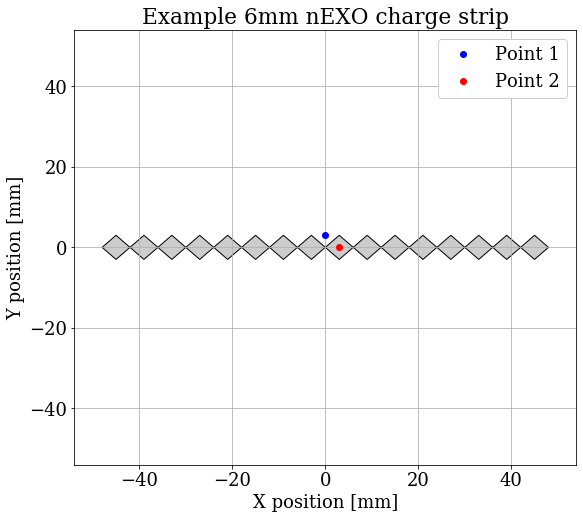

In [9]:
SignalCalculator.DrawStrip()

pt1 = (0., 3., 300.) # (x,y,z) coordinates of ionization event, given in mm
pt2 = (3., 0., 300.) # (x,y,z) coordinates of ionization event, given in mm

plt.plot(pt1[0],pt1[1],'ob',label='Point 1')
plt.plot(pt2[0],pt2[1],'or',label='Point 2')
plt.xlabel('X position [mm]')
plt.ylabel('Y position [mm]')
plt.title('Example 6mm nEXO charge strip')
plt.grid()
plt.legend(framealpha=1.)


(0.0, 1.05)

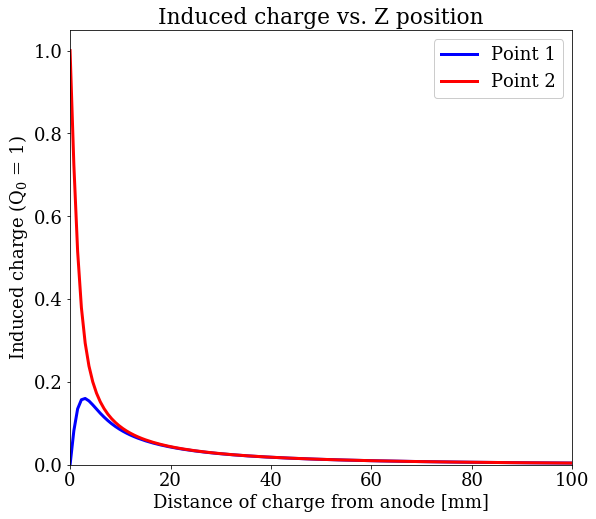

In [26]:
Q = 1. # Assume a unit charge

n_zsteps = 400

pt1_z_steps = np.linspace( 0., pt1[2], n_zsteps)
pt2_z_steps = np.linspace( 0., pt2[2], n_zsteps)

pt1_charge_vs_z = np.zeros(n_zsteps)
pt2_charge_vs_z = np.zeros(n_zsteps)


for i in range(n_zsteps):
    
    pt1_charge_vs_z[i] = SignalCalculator.InducedChargeNEXOStrip( 1., \
                                                                    pt1[0], pt1[1], \
                                                                    pt1_z_steps[i], \
                                                                    padSize=6.)
    pt2_charge_vs_z[i] = SignalCalculator.InducedChargeNEXOStrip( 1., \
                                                                    pt2[0], pt2[1], \
                                                                    pt2_z_steps[i], \
                                                                    padSize=6.)


plt.plot(pt1_z_steps,pt1_charge_vs_z,'-b',linewidth=3,label='Point 1')
plt.plot(pt2_z_steps,pt2_charge_vs_z,'-r',linewidth=3,label='Point 2')

plt.xlabel('Distance of charge from anode [mm]')
plt.ylabel(r'Induced charge (Q$_0$ = 1)')
plt.title('Induced charge vs. Z position')
plt.legend(framealpha=1.)
plt.xlim(0.,100.)
plt.ylim(0.0,1.05)


(0.0, 1.05)

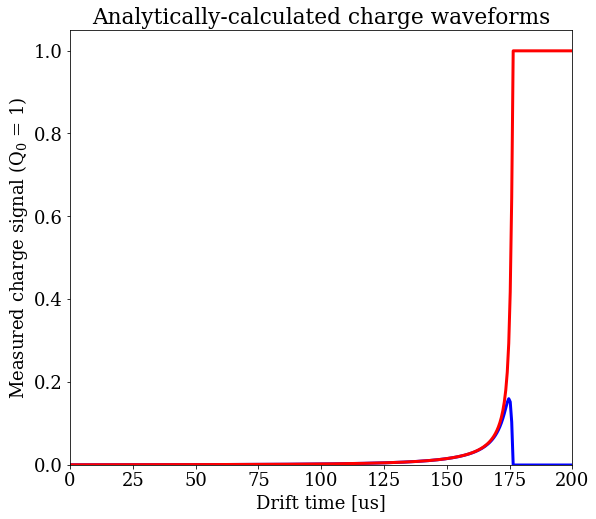

In [43]:
plt.title('Analytically-calculated charge waveforms')

pt1_drift_points, pt1_charge_wfm = SignalCalculator.ComputeChargeWaveformOnStripWithIons( \
                                                    Q, pt1[0], pt1[1], pt1[2], \
                                                    padSize=6., numPads=16 )
pt2_drift_points, pt2_charge_wfm = SignalCalculator.ComputeChargeWaveformOnStripWithIons( \
                                                    Q, pt2[0], pt2[1], pt2[2], \
                                                    padSize=6., numPads=16 )

# Add an extra point on the end to force the charge signal to stay at the 
# amount of collected charge after the collection takes place
pt1_drift_points = np.append( pt1_drift_points, 200.)
pt2_drift_points = np.append( pt2_drift_points, 200.)

pt1_charge_wfm = np.append( pt1_charge_wfm, pt1_charge_wfm[-1])
pt2_charge_wfm = np.append( pt2_charge_wfm, pt2_charge_wfm[-1])


# Plot the waveforms
plt.plot(pt1_drift_points,pt1_charge_wfm,'-b',linewidth=3,label='Point 1')
plt.plot(pt2_drift_points,pt2_charge_wfm,'-r',linewidth=3,label='Point 2')

plt.xlabel('Drift time [us]')
plt.ylabel(r'Measured charge signal (Q$_0$ = 1)')

plt.xlim(0.,200.)
plt.ylim(0.,1.05)


    

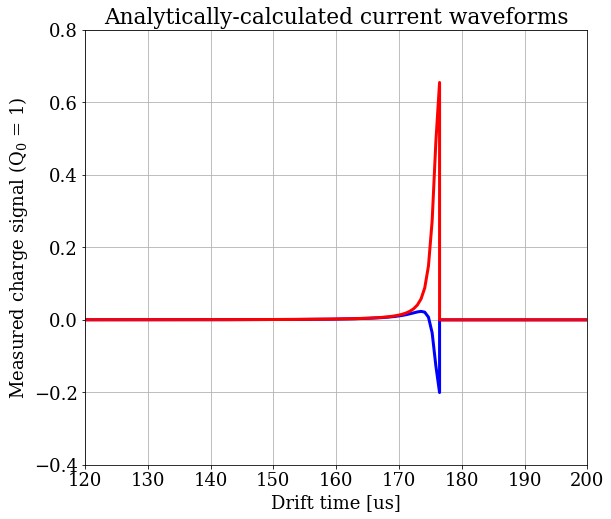

In [44]:
plt.title('Analytically-calculated current waveforms')

pt1_drift_points, pt1_current_wfm = SignalCalculator.ComputeCurrentWaveformOnStrip( \
                                                    Q, pt1[0], pt1[1], pt1[2], \
                                                    padSize=6., numPads=16 )
pt2_drift_points, pt2_current_wfm = SignalCalculator.ComputeCurrentWaveformOnStrip( \
                                                    Q, pt2[0], pt2[1], pt2[2], \
                                                    padSize=6., numPads=16 )

# Add extra points on the end to force the current to go to 0 after
# the charge gets collected.
pt1_drift_points = np.append( pt1_drift_points, pt1_drift_points[-1])
pt2_drift_points = np.append( pt2_drift_points, pt2_drift_points[-1])

pt1_drift_points = np.append( pt1_drift_points, 200.)
pt2_drift_points = np.append( pt2_drift_points, 200.)

pt1_current_wfm = np.append( pt1_current_wfm, [0., 0.])
pt2_current_wfm = np.append( pt2_current_wfm, [0., 0.])


# Plot the waveforms
plt.plot(pt1_drift_points,pt1_current_wfm,'-b',linewidth=3,label='Point 1')
plt.plot(pt2_drift_points,pt2_current_wfm,'-r',linewidth=3,label='Point 2')

plt.xlabel('Drift time [us]')
plt.ylabel(r'Measured charge signal (Q$_0$ = 1)')

plt.xlim(120.,200.)
plt.ylim(-0.,0.8)
plt.grid()
